In [3]:
import pandas as pd 
import sklearn as sk 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [4]:
#read in the excel training set
df = pd.read_excel('aml_training.csv.xlsx')
df.head()

,sample,1_FS Lin,1_SS Log,1_FL1 Log,1_FL2 Log,1_FL3 Log,1_FL4 Log,1_FL5 Log,2_FS Lin,2_SS Log,...,7_FL4 Log,7_FL5 Log,8_FS Lin,8_SS Log,8_FL1 Log,8_FL2 Log,8_FL3 Log,8_FL4 Log,8_FL5 Log,Label
0,1,0.707966,0.554379,0.205182,0.202277,0.589269,0.181832,0.161980,0.638412,0.551979,...,0.279709,0.275803,0.719039,0.553640,0.213654,0.211454,0.225994,0.168969,0.160188,normal
1,2,0.467486,0.537679,0.281149,0.259472,0.492262,0.190994,0.167108,0.419098,0.537351,...,0.229569,0.281986,0.546862,0.545784,0.289002,0.264373,0.251639,0.172091,0.161918,normal
2,3,0.561064,0.581185,0.278798,0.249169,0.542159,0.179060,0.162542,0.617604,0.592611,...,0.220677,0.210012,0.687503,0.590040,0.286996,0.256483,0.267841,0.199506,0.173292,normal
3,4,0.570661,0.573792,0.241633,0.241526,0.499962,0.185286,0.177292,0.541289,0.575598,...,0.226982,0.231452,0.630483,0.575120,0.237540,0.230018,0.246263,0.173082,0.164838,normal
4,5,0.714988,0.503988,0.303876,0.269966,0.547477,0.224098,0.170734,0.691591,0.505033,...,0.292525,0.172033,0.800088,0.504860,0.306547,0.278918,0.235462,0.213511,0.161466,aml


In [5]:
#make the test and label by dropping the columns in the dataframes
x = df.drop(['Label','sample'], axis=1)
y = df['Label']

#test train split. 20 percent of the data(30 samples) will be used to test our predictions
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [6]:
#scaling the whole dataset just in case it isn't normalized
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [7]:
#initializing the SGD classifier with LOG 
clf = SGDClassifier(loss='log', penalty='l2')
clf.fit(trainX, trainY)

SGDClassifier(loss='log')

In [8]:
#predicting
y_pred = clf.predict(testX)


In [9]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.97


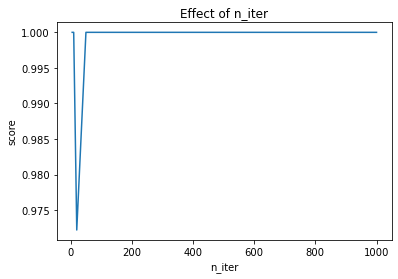

In [10]:
#checking the model for different iterations
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [11]:
#linear SGD classifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(trainX, trainY)

SGDClassifier()

In [12]:
y_pred = clf.predict(testX)


In [13]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.97


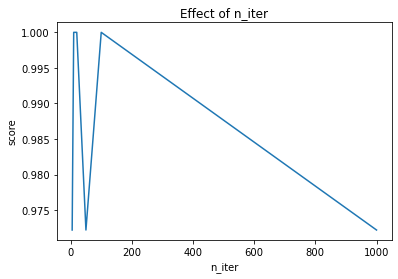

In [14]:

n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

In [15]:
#grid search implementation

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(trainX, trainY)

print(grid.best_params_) 


{'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [16]:
grid_predictions = grid.predict(testX) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 1.00


In [17]:
df1 = pd.read_excel('aml_test.xlsx')
df1.head()

,sample,1_FS Lin,1_SS Log,1_FL1 Log,1_FL2 Log,1_FL3 Log,1_FL4 Log,1_FL5 Log,2_FS Lin,2_SS Log,...,7_FL3 Log,7_FL4 Log,7_FL5 Log,8_FS Lin,8_SS Log,8_FL1 Log,8_FL2 Log,8_FL3 Log,8_FL4 Log,8_FL5 Log
0,180,0.819674,0.572358,0.286109,0.265035,0.580485,0.191883,0.169666,0.789074,0.572477,...,0.580460,0.221765,0.245350,0.895003,0.574811,0.290639,0.259340,0.261476,0.186094,0.166414
1,181,0.260749,0.557254,0.313381,0.259912,0.595626,0.220646,0.166911,0.248909,0.560007,...,0.600458,0.254368,0.196082,0.280288,0.553778,0.293868,0.252109,0.282186,0.221657,0.174636
2,182,0.472155,0.573742,0.286131,0.291627,0.583095,0.200500,0.172627,0.449666,0.573902,...,0.589111,0.236815,0.221288,0.543048,0.576304,0.290041,0.274517,0.257954,0.209413,0.177621
3,183,0.465602,0.503966,0.261807,0.232198,0.547764,0.211277,0.156191,0.437000,0.508588,...,0.579605,0.332763,0.251493,0.554041,0.514105,0.272622,0.245683,0.222039,0.195645,0.157242
4,184,0.307276,0.508645,0.261762,0.236118,0.593177,0.169992,0.157534,0.272102,0.508456,...,0.594995,0.291149,0.241280,0.351541,0.510846,0.270590,0.243356,0.253543,0.182472,0.159937


In [18]:
#
pred_aml_x = df1.drop(['sample'], axis=1)

In [19]:
scaler = StandardScaler()
scaler.fit(pred_aml_x)
pred_trainX = scaler.transform(pred_aml_x)

test_predictions = grid.predict(pred_trainX)


In [21]:
len(test_predictions)

180

In [23]:
for x in test_predictions:
    print(x)

normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
aml
normal
aml
normal
normal
normal
normal
normal
aml
normal
normal
normal
normal
normal
normal
normal
aml
normal
aml
normal
normal
normal
normal
normal
aml
normal
normal
normal
normal
normal
normal
normal
normal
aml
normal
normal
aml
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
aml
aml
normal
normal
normal
normal
normal
normal
aml
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
aml
aml
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
aml
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
aml
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
aml
normal
normal
norma